In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ast
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import nltk
from nltk.text import Text
from datetime import datetime, timedelta

In [5]:
pip install praw


Note: you may need to restart the kernel to use updated packages.


In [6]:
import praw

In [7]:
from praw.models import Submission

In [8]:
req_reddit = requests.get('https://www.reddit.com/r/wallstreetbets/')
page_reddit = req_reddit.text

In [10]:
df_Overtime = pd.read_csv('d:/Machine_Learning/Erdoes_Fall/project/PatData/secondDataFrame.csv', index_col = False)

FileNotFoundError: [Errno 2] No such file or directory: 'd:/Machine_Learning/Erdoes_Fall/project/PatData/secondDataFrame.csv'

In [9]:
df_Overtime.loc[df_Overtime.upvotes>5000, 'post_id'].value_counts().index

NameError: name 'df_Overtime' is not defined

In [201]:
url = df_Overtime.loc[df_Overtime.upvotes>5000, 'comment_url'].value_counts().index
len(url)

92

In [39]:
df_newPost = pd.read_csv('d:/Machine_Learning/Erdoes_Fall/project/PatData/firstDataFrame.csv', index_col = False)

In [40]:
df_Overtime = pd.read_csv('d:/Machine_Learning/Erdoes_Fall/project/PatData/secondDataFrame.csv', index_col = False)

In [43]:
df_newPost.columns

Index(['Unnamed: 0', 'post_id', 'active_track', 'title', 'comment_url',
       'link_url', 'flair', 'submit_time', 'rising_val', 'hot_val', 'username',
       'post_karma', 'comment_karma', 'redditor_for', 'upvotes',
       'upvote_percent', 'num_comments'],
      dtype='object')

In [44]:
df_newPost.drop('Unnamed: 0', axis=1, inplace = True)

In [52]:
df_newPost.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments
0,0,No,"Did this today, what do y’all think?",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/q8wj4gnmnmu71.jpg,Meme,"""2021-10-20T15:55:24",99,29,Cintre,61710,26091,662.870045,14,94,7
1,1,No,Heron Therapeutics (HRTX) My Unicorn,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:54:25",99,88,Born-Ad-413,34,87,173.186914,1,67,3
2,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,2954,4259,1618.662336,2,75,9
3,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,12425,11004,1861.732471,1,53,18
4,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,15608,4904,2034.134827,5,78,10


In [54]:
df_newPost.loc[df_newPost.post_id == 0]

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments
0,0,No,"Did this today, what do y’all think?",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/q8wj4gnmnmu71.jpg,Meme,"""2021-10-20T15:55:24",99,29,Cintre,61710,26091,662.870045,14,94,7


In [61]:
Onetime_only_post_ids = []
for i in df_Overtime.post_id:
    if len(df_Overtime.loc[df_Overtime.post_id == i]) == 1:
        Onetime_only_post_ids.append(i)

In [65]:
len(Onetime_only_post_ids)

396

In [69]:
df_Overtime.loc[df_Overtime.post_id == 2].index

Int64Index([   2,    6,   25,   59,   99,  162,  226,  267,  348,  447,  513,
             624,  737,  804,  923, 1040, 1114, 1242, 1344, 1478, 1557, 1704,
            1786, 1939, 2113],
           dtype='int64')

In [74]:
for i in Onetime_only_post_ids:
    index_value = df_Overtime.loc[df_Overtime.post_id == i].index
    df_Overtime.drop(index_value, axis = 0, inplace = True)

In [77]:
df_Overtime.shape

(87497, 9)

In [75]:
df_Overtime.head()

,stat_id,post_id,comment_url,hour,rising_val,hot_val,upvotes,upvote_percent,num_comments
2,2,2,https://old.reddit.com/r/wallstreetbets/commen...,0,9,70,2,75,9
3,3,3,https://old.reddit.com/r/wallstreetbets/commen...,0,4,91,1,53,18
4,4,4,https://old.reddit.com/r/wallstreetbets/commen...,0,5,49,5,78,10
5,5,5,https://old.reddit.com/r/wallstreetbets/commen...,0,2,24,20,81,12
6,6,2,https://old.reddit.com/r/wallstreetbets/commen...,1,9,78,2,67,11


In [83]:
df_Overtime.to_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Overtime.csv', index = False)   

In [85]:
df_Overtime.describe()

,stat_id,post_id,hour,rising_val,hot_val,upvotes,upvote_percent,num_comments
count,87497.000000,87497.000000,87497.000000,87497.000000,87497.000000,87497.000000,87497.000000,87497.000000
mean,43953.767535,2048.730345,11.786004,85.925460,533.094003,441.138073,81.995988,146.864601
std,25360.029269,1171.709059,7.240755,31.415099,476.601284,2700.442639,15.006660,1097.380393
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,21987.000000,1033.000000,5.000000,99.000000,45.000000,9.000000,75.000000,7.000000
50%,43962.000000,2052.000000,12.000000,99.000000,999.000000,25.000000,86.000000,16.000000
75%,65914.000000,3064.000000,18.000000,99.000000,999.000000,88.000000,93.000000,37.000000
max,87885.000000,4153.000000,24.000000,99.000000,999.000000,77558.000000,100.000000,18870.000000


In [166]:
df_Overtime.corr()

,stat_id,post_id,hour,rising_val,hot_val,upvotes,upvote_percent,num_comments
stat_id,1.000000,0.998512,0.032324,0.008821,0.030208,0.012074,0.028865,-0.004302
post_id,0.998512,1.000000,-0.017848,-0.005883,0.016719,0.007743,0.029512,-0.007161
hour,0.032324,-0.017848,1.000000,0.298611,0.257717,0.079763,-0.006403,0.049243
rising_val,0.008821,-0.005883,0.298611,1.000000,0.404731,-0.286422,-0.201136,-0.039315
hot_val,0.030208,0.016719,0.257717,0.404731,1.000000,-0.155008,-0.338677,-0.122970
upvotes,0.012074,0.007743,0.079763,-0.286422,-0.155008,1.000000,0.106220,0.083538
upvote_percent,0.028865,0.029512,-0.006403,-0.201136,-0.338677,0.106220,1.000000,0.061413
num_comments,-0.004302,-0.007161,0.049243,-0.039315,-0.122970,0.083538,0.061413,1.000000


In [167]:
df_newPost.corr()

,post_id,rising_val,hot_val,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments
post_id,1.000000,-0.050946,0.087434,0.000654,-0.014952,-0.020245,0.043058,-0.020624,-0.000390
rising_val,-0.050946,1.000000,0.164176,-0.030989,-0.033836,-0.045525,-0.272005,-0.027344,-0.062085
hot_val,0.087434,0.164176,1.000000,-0.063741,-0.051369,-0.032339,-0.309738,-0.318182,-0.062887
post_karma,0.000654,-0.030989,-0.063741,1.000000,0.486317,0.278598,0.080906,0.084347,0.386018
comment_karma,-0.014952,-0.033836,-0.051369,0.486317,1.000000,0.184039,0.056620,0.053170,0.190467
redditor_for,-0.020245,-0.045525,-0.032339,0.278598,0.184039,1.000000,0.056131,0.118494,0.153133
upvotes,0.043058,-0.272005,-0.309738,0.080906,0.056620,0.056131,1.000000,0.341342,0.127843
upvote_percent,-0.020624,-0.027344,-0.318182,0.084347,0.053170,0.118494,0.341342,1.000000,0.042316
num_comments,-0.000390,-0.062085,-0.062887,0.386018,0.190467,0.153133,0.127843,0.042316,1.000000


In [176]:
len(Top_upvote_post_ids)

92

In [425]:
len(df_Overtime.loc[df_Overtime.upvotes<10, 'post_id'].value_counts().index)

2415

In [175]:
Top_upvote_post_ids = df_Overtime.loc[df_Overtime.upvotes>5000, 'post_id'].value_counts().index
Low_upvote_post_ids = df_Overtime.loc[df_Overtime.upvotes<10, 'post_id'].value_counts().index

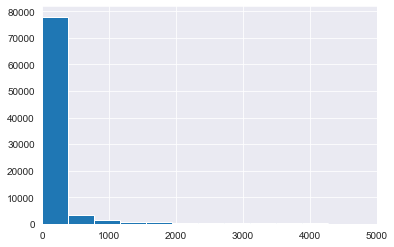

In [187]:
plt.hist(df_Overtime.upvotes, bins=200)
plt.xlim(left = -10, right = 5000)
plt.show()

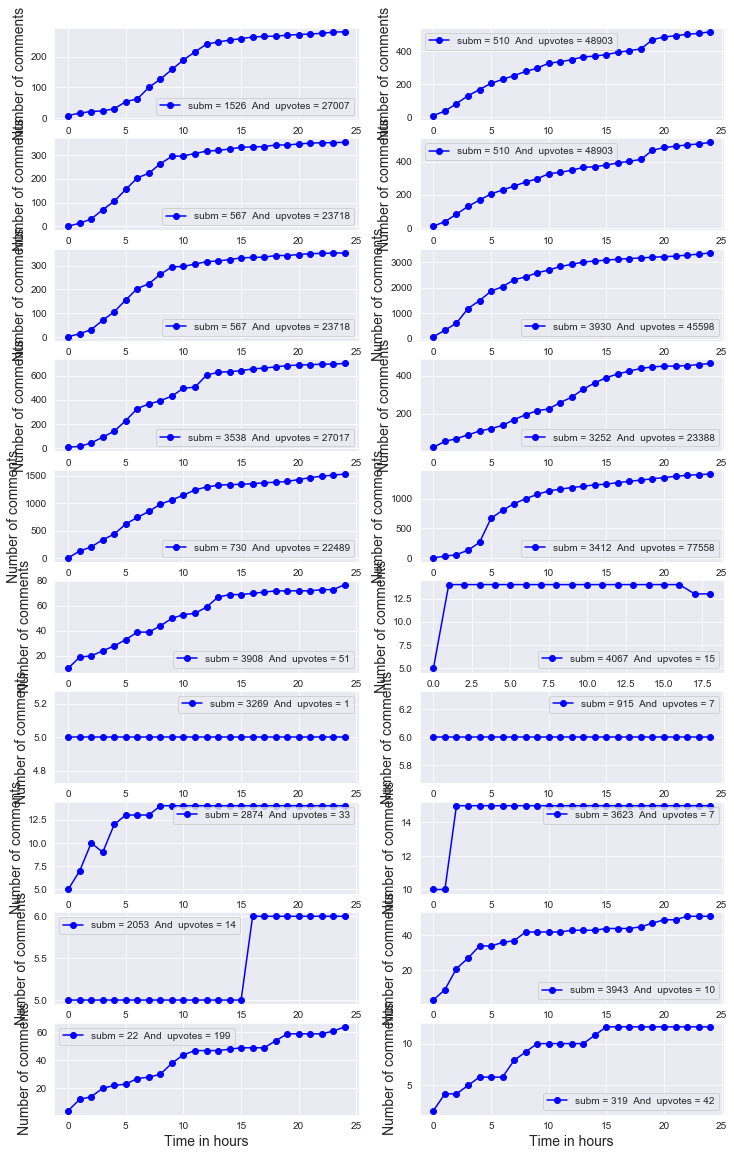

In [165]:
rand_top_ids = pd.Series(np.random.choice(Top_upvote_post_ids, 10))
rand_low_ids = pd.Series(np.random.choice(Low_upvote_post_ids, 10))
ids = rand_top_ids.append(rand_low_ids)
ids.reset_index(drop = True, inplace = True)
binwidth = 1
fig,ax = plt.subplots(int(len(ids)/2),2,figsize=(12,20))
for i in range(len(ids)):
    submission = ids[i]
    upvotes = max(df_Overtime.loc[df_Overtime.post_id == submission, 'upvotes'])
    times = df_Overtime.loc[df_Overtime.post_id == submission, 'hour']
    number_comments = df_Overtime.loc[df_Overtime.post_id == submission, 'num_comments']
    ax[i//2,i%2].plot(times, number_comments,
                      color = 'b',marker = 'o',
                      label = ('subm = '+ str(submission)+'  And  '+'upvotes = '+ str(upvotes)))
    #ax[i//2,i%2].set_xlim(left = 0, right = 100)
    ax[i//2,i%2].set_xlabel('Time in hours', fontsize = 14)
    ax[i//2, i%2].set_ylabel('Number of comments', fontsize = 14)
    ax[i//2, i%2].legend(loc = 'best', fontsize = 10)
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\num_comment_overtime.jpeg')
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\num_comment_overtime.svg')
plt.show()

In [223]:
df_newPost.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments
0,0,No,"Did this today, what do y’all think?",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/q8wj4gnmnmu71.jpg,Meme,"""2021-10-20T15:55:24",99,29,Cintre,61710,26091,662.870045,14,94,7
1,1,No,Heron Therapeutics (HRTX) My Unicorn,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:54:25",99,88,Born-Ad-413,34,87,173.186914,1,67,3
2,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,2954,4259,1618.662336,2,75,9
3,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,12425,11004,1861.732471,1,53,18
4,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,15608,4904,2034.134827,5,78,10


In [224]:
df_Overtime.head()

,stat_id,post_id,comment_url,hour,rising_val,hot_val,upvotes,upvote_percent,num_comments
2,2,2,https://old.reddit.com/r/wallstreetbets/commen...,0,9,70,2,75,9
3,3,3,https://old.reddit.com/r/wallstreetbets/commen...,0,4,91,1,53,18
4,4,4,https://old.reddit.com/r/wallstreetbets/commen...,0,5,49,5,78,10
5,5,5,https://old.reddit.com/r/wallstreetbets/commen...,0,2,24,20,81,12
6,6,2,https://old.reddit.com/r/wallstreetbets/commen...,1,9,78,2,67,11


# Top Upvote Posts

In [ ]:
# I select the posts with upvotes > 5000 and get their comments and analyze them. A dictionary of the most common 
# words will be returned which can be also found in the dataframe Most_comment_top_df. 

In [406]:
comment_urls_top = []
ids = df_Overtime.loc[df_Overtime.upvotes>5000, 'post_id'].value_counts().index
for i in ids:
    comment_urls_top.append(df_Overtime.loc[df_Overtime.post_id == i, 'comment_url'].value_counts().index)

In [401]:
txt = comment_urls[0][0]
txt.split('/')[6]

'qt5fe7'

In [407]:
#Here i get the submission ids for the posts
submission_top = []
for url in comment_urls_top:
    url = url[0]
    submission_top.append(url.split('/')[6])
    

In [408]:
test = reddit.submission(submission_top[0])
test.title

'Thanks to $TSLA, I’m buying a new wife for Christmas.'

In [410]:
scores = []
sub_ids = [] # this is the same as submission id but out of the comment loop
submission_ids = []
upvotes = []
time_uploads = []
titles = []
text = []
first_time_commented = []
last_time_commented = []
middle_comment_time = []
each_comment_time = []
flairs = []
sub_text = []
parent_ids = []
comment_ids = []
comment_bodies = []
dict = {}

# Get the top most popular posts of the last year for 92 posts

i = 0
for sub in submission_top:
    submission = reddit.submission(sub)
    if i % 10 == 0:
        out = i * 1. / 92 * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    
    if not submission.stickied:
        sub_ids.append(submission)
        sub_text.append(submission.selftext)
        flairs.append(submission.link_flair_text)
        titles.append(submission.title)
        scores.append(submission.score)
        time_uploads.append(datetime.fromtimestamp(submission.created))
        upvotes.append(submission.upvote_ratio)
        
        # Here I make a separate dataframe for the comments
        
        comments = submission.comments
        submission.comments.replace_more(limit = 0)
        comment_times = []
        text = []
        
        for comment in submission.comments.list():
            
            submission_ids.append(submission)
            parent_ids.append(comment.parent())
            comment_ids.append(comment.id)
            
            comment_bodies.append(comment.body)
           
            comment_times.append(comment.created_utc)
            each_comment_time.append(datetime.fromtimestamp(comment.created_utc))
        text= comment_bodies   
        #This will make a dictionary of the comments    
        dict[str(submission)] = text    
        
        sorted_comments_times = sorted(comment_times)
        
        # Here I will get the time for the middle comment on a post
        middle_comment = len(sorted_comments_times)/2
      
        middle_comment_time.append(datetime.fromtimestamp(comment_times[int(middle_comment)]))
        
        
        first_time_commented.append(datetime.fromtimestamp(sorted_comments_times[0]))
        last_time_commented.append(datetime.fromtimestamp(sorted_comments_times[-1]))
        i = i + 1

        
df_comments_top = pd.DataFrame(list(zip(submission_ids, parent_ids, comment_ids,each_comment_time, comment_bodies)),
                           columns = ['submission_id','parent_id','comment_id','comment_time','comment'])    

df_submission_top = pd.DataFrame(list(zip(sub_ids,flairs, titles, scores, upvotes, time_uploads,first_time_commented,last_time_commented,middle_comment_time, sub_text)), 
                             columns = ['submission_id','Flair','title','score','upvotes','time_upload','first_time_commented','last_time_commented','middle_comment_time', 'text'])
#f = open('d:\Machine_Learning\Erdoes_Fall\project\comment_dict.txt', 'w',encoding="utf-8")
#f.write(str(dict))
#f.close()
df_comments_top.to_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetTOP_comments.csv', index = False)            
df_submission_top.to_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetTOP_mainSubmission.csv', index = False)        

97%

In [ ]:
df_submission_top = pd.read_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetTOP_mainSubmission.csv', index_col = False)

In [415]:
df_submission_top.head()

,submission_id,Flair,title,score,upvotes,time_upload,first_time_commented,last_time_commented,middle_comment_time,text,duration_middle,duration_total
0,qt5fe7,Gain,"Thanks to $TSLA, I’m buying a new wife for Chr...",46551,0.74,2021-11-13 09:05:09,2021-11-13 09:05:35,2021-11-14 13:21:13,2021-11-13 13:56:51,,04:51:16,1 days 04:15:38
1,qtswnt,Meme,Blame Bernie if Elon sells more Tesla stock lol,51249,0.66,2021-11-14 08:05:49,2021-11-14 08:08:48,2021-11-15 03:41:32,2021-11-14 12:36:22,,04:27:34,0 days 19:32:44
2,qmn4vd,Meme,Its the way it goes,36851,0.91,2021-11-04 08:30:24,2021-11-04 08:31:46,2021-11-14 20:09:24,2021-11-04 13:56:00,,05:24:14,10 days 11:37:38
3,qsbj9q,Meme,Makes sense.,41235,0.91,2021-11-12 05:48:04,2021-11-12 05:49:24,2021-11-13 16:23:34,2021-11-12 12:37:27,,06:48:03,1 days 10:34:10
4,qec10r,Meme,Yes,51060,0.87,2021-10-23 12:46:09,2021-10-23 12:50:57,2021-11-11 07:42:04,2021-10-23 15:00:28,,02:09:31,18 days 18:51:07


In [413]:
df_submission_top.describe()

,score,upvotes
count,92.000000,92.000000
mean,18829.989130,0.927609
std,14374.670298,0.059787
min,5234.000000,0.660000
25%,7577.000000,0.910000
50%,13389.000000,0.940000
75%,26650.250000,0.960000
max,79194.000000,0.990000


In [412]:
df_comments_top.head()

,submission_id,parent_id,comment_id,comment_time,comment
0,qt5fe7,qt5fe7,hkh4jy1,2021-11-13 09:05:35,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...
1,qt5fe7,qt5fe7,hkh6tph,2021-11-13 09:21:27,When losing 220k doesn’t even matter anymore l...
2,qt5fe7,qt5fe7,hkha1uf,2021-11-13 09:44:00,its amazing how fast you can turn a million in...
3,qt5fe7,qt5fe7,hkh5bad,2021-11-13 09:10:55,"To become a millionaire, start as a millionair..."
4,qt5fe7,qt5fe7,hkh97k2,2021-11-13 09:38:05,This is proof that all you need is a few $mill...


In [417]:
df_comments_top.describe()

,submission_id,parent_id,comment_id,comment_time,comment
count,32067,32067,32067,32067,32067
unique,92,11533,32067,31672,30591
top,qnf8ot,qh44rf,hjuz27y,2021-11-02 12:42:41,[deleted]
freq,498,215,1,3,339
first,NaN,NaN,NaN,2021-10-20 09:27:58,NaN
last,NaN,NaN,NaN,2021-11-19 16:44:30,NaN


In [414]:
df_submission_top['duration_middle'] = pd.to_datetime(df_submission_top.middle_comment_time) - pd.to_datetime(df_submission_top.first_time_commented)
df_submission_top['duration_total'] = pd.to_datetime(df_submission_top.last_time_commented)- pd.to_datetime(df_submission_top.first_time_commented)

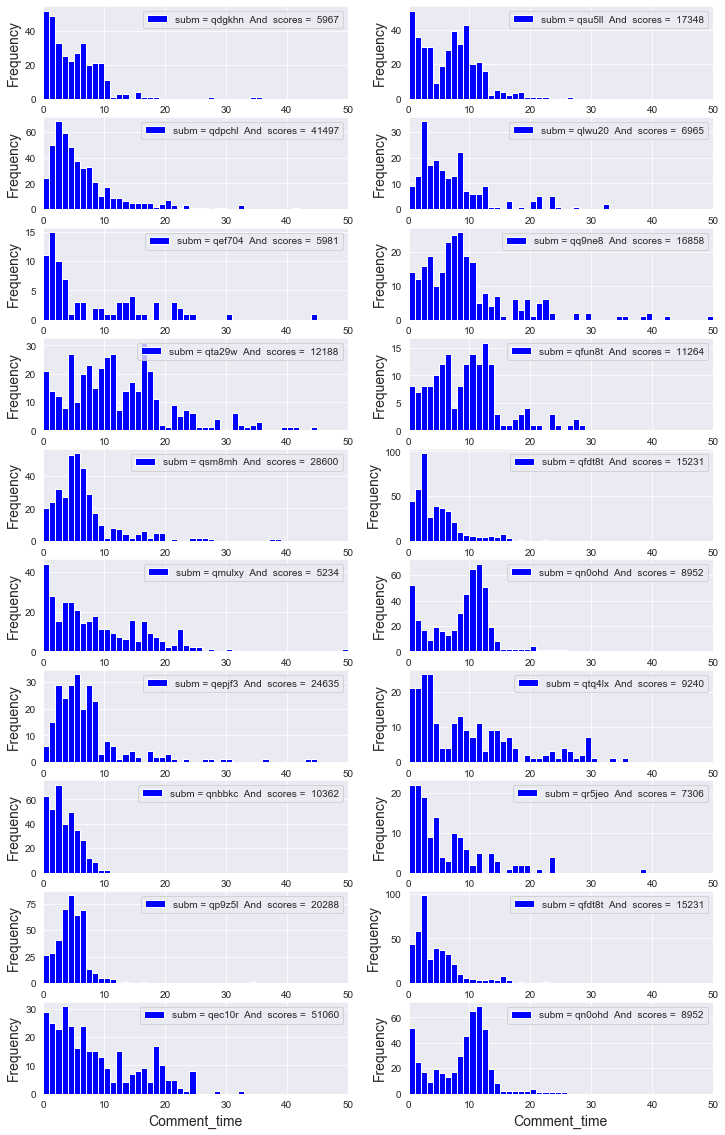

In [433]:

ids = np.random.choice(submission_top,20)

binwidth = 1
fig,ax = plt.subplots(int(len(ids)/2),2,figsize=(12,20))
for i in range(len(ids)):
    submission = ids[i]
    scores = df_submission_top.loc[df_submission_top.submission_id == submission, 'score']
    times = df_comments_top.loc[df_comments_top.submission_id == submission, 'comment_time']
    sorted_times = sorted(times)
    durations = pd.to_datetime(times) - pd.to_datetime(sorted_times[0])
    comment_time_from_start = [t.total_seconds()/3600 for t in durations]
    ax[i//2,i%2].hist(comment_time_from_start,
                      bins=np.arange(min(comment_time_from_start), max(comment_time_from_start) + binwidth, binwidth),
                      color = 'b', label = ('subm = '+ str(submission)+'  And  '+'scores = '+ scores.to_string(index = False)))
    ax[i//2,i%2].set_xlim(left = 0, right = 50)
    ax[i//2,i%2].set_xlabel('Comment_time', fontsize = 14)
    ax[i//2, i%2].set_ylabel('Frequency', fontsize = 14)
    ax[i//2, i%2].legend(loc = 'best', fontsize = 10)
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\comment_time_hist_High_upvotes.jpeg')
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\comment_time_hist_High_upvotes.svg')
plt.show()

In [438]:
# Here I make a dictionary containing all comments for each post. submission number of each post is the key and all the 
# comments on that post is the value.
dictionary_top = {}
total = len(submission_top)
print(total)
i=0
for submission in submission_top:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    text = []
    for comment in df_comments_top.loc[df_comments_top.submission_id == submission, 'comment']:
        text.append(comment)   
    dictionary_top[str(submission)] = text
    i = i +1

92
97%

# Lowest upvote posts

In [418]:
comment_urls_Low = []
ids = df_Overtime.loc[df_Overtime.upvotes<10, 'post_id'].value_counts().index
for i in ids:
    comment_urls_Low.append(df_Overtime.loc[df_Overtime.post_id == i, 'comment_url'].value_counts().index)

In [419]:
submission_Low = []
for url in comment_urls_Low:
    url = url[0]
    submission_Low.append(url.split('/')[6])

In [426]:
scores = []
sub_ids = [] # this is the same as submission id but out of the comment loop
submission_ids = []
upvotes = []
time_uploads = []
titles = []
text = []
first_time_commented = []
last_time_commented = []
middle_comment_time = []
each_comment_time = []
flairs = []
sub_text = []
parent_ids = []
comment_ids = []
comment_bodies = []
dict = {}
# Get the top most popular posts of the last year for 92 posts

i = 0
for sub in submission_Low:
    submission = reddit.submission(sub)
    if i % 10 == 0:
        out = i * 1. / len(submission_Low) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    
    if not submission.stickied:
        sub_ids.append(submission)
        sub_text.append(submission.selftext)
        flairs.append(submission.link_flair_text)
        titles.append(submission.title)
        scores.append(submission.score)
        time_uploads.append(datetime.fromtimestamp(submission.created))
        upvotes.append(submission.upvote_ratio)
        
        # Here I make a separate dataframe for the comments
        
        comments = submission.comments
        submission.comments.replace_more(limit = 0)
        comment_times = []
        text = []
        
        for comment in submission.comments.list():
            
            submission_ids.append(submission)
            parent_ids.append(comment.parent())
            comment_ids.append(comment.id)
            
            comment_bodies.append(comment.body)
           
            comment_times.append(comment.created_utc)
            each_comment_time.append(datetime.fromtimestamp(comment.created_utc))
        text= comment_bodies   
        #This will make a dictionary of the comments    
        dict[str(submission)] = text    
        
        sorted_comments_times = sorted(comment_times)
        
        # Here I will get the time for the middle comment on a post
        if len(comment_times) != 0:
            middle_comment = len(sorted_comments_times)/2
        
            middle_comment_time.append(datetime.fromtimestamp(comment_times[int(middle_comment)]))
        
        
            first_time_commented.append(datetime.fromtimestamp(sorted_comments_times[0]))
            last_time_commented.append(datetime.fromtimestamp(sorted_comments_times[-1]))
        i = i + 1

        
df_comments_Low = pd.DataFrame(list(zip(submission_ids, parent_ids, comment_ids,each_comment_time, comment_bodies)),
                           columns = ['submission_id','parent_id','comment_id','comment_time','comment'])    

df_submission_Low = pd.DataFrame(list(zip(sub_ids,flairs, titles, scores, upvotes, time_uploads,first_time_commented,last_time_commented,middle_comment_time, sub_text)), 
                             columns = ['submission_id','Flair','title','score','upvotes','time_upload','first_time_commented','last_time_commented','middle_comment_time', 'text'])
#f = open('d:\Machine_Learning\Erdoes_Fall\project\comment_dict.txt', 'w',encoding="utf-8")
#f.write(str(dict))
#f.close()
df_comments_Low.to_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetLow_comments.csv', index = False)            
df_submission_Low.to_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetLow_mainSubmission.csv', index = False)        

99%

In [ ]:
df_submission_Low = pd.read_csv('d:\Machine_Learning\Erdoes_Fall\project\PatData\Reddit_wallstreetLow_mainSubmission.csv', index_col = False)

In [435]:
df_submission_Low.head()

,submission_id,Flair,title,score,upvotes,time_upload,first_time_commented,last_time_commented,middle_comment_time,text,duration_middle,duration_total
0,qmlrxk,News,JPMorgan Chase & Co. Invests $1.47 Million in ...,7,0.73,2021-11-04 07:26:57,2021-11-04 07:26:57,2021-11-04 08:04:41,2021-11-04 07:26:57,,00:00:00,00:37:44
1,qmpwwz,News,Driving Change Season 2: Episode 2 Sneak Peek ...,0,0.20,2021-11-04 10:32:59,2021-11-04 10:33:00,2021-11-04 10:34:58,2021-11-04 10:33:00,,00:00:00,00:01:58
2,qdjohg,News,Wanna see what stocks Harvard holds?,1,0.60,2021-10-22 08:44:18,2021-10-22 08:44:18,2021-10-22 08:45:51,2021-10-22 08:44:18,,00:00:00,00:01:33
3,qejx83,Meme,To every one of you retards that bail. You can...,6,0.67,2021-10-23 20:23:35,2021-10-23 20:24:11,2021-10-23 20:30:20,2021-10-23 20:30:20,,00:06:09,00:06:09
4,qchd6w,News,How much you wana bet they are still alive?,0,0.41,2021-10-20 19:29:00,2021-10-20 19:29:49,2021-10-20 22:13:49,2021-10-20 19:41:36,,00:11:47,02:44:00


In [428]:
df_comments_Low.head()

,submission_id,parent_id,comment_id,comment_time,comment
0,qmlrxk,qmlrxk,hjaagui,2021-11-04 07:27:59,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...
1,qmlrxk,qmlrxk,hjaaox4,2021-11-04 07:29:33,Idt JPM investing 4.9*10^-5 % of their AUM in ...
2,qmlrxk,qmlrxk,hjaasvo,2021-11-04 07:30:19,"**ALSO, BlackRock has a $54 Million Position**"
3,qmlrxk,qmlrxk,hjaabgk,2021-11-04 07:26:57,News posts **must be market moving** and conta...
4,qmlrxk,qmlrxk,hjafxcb,2021-11-04 08:04:41,That’s like change they found in their couch c...


In [445]:
# Here I make a dictionary containing all comments for each post. submission number of each post is the key and all the 
# comments on that post is the value.
dictionary_Low = {}
sub_Low = np.random.choice(submission_Low,100)
total = len(sub_Low)
print(total)
i=0
for submission in sub_Low:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    text = []
    for comment in df_comments_Low.loc[df_comments_Low.submission_id == submission, 'comment']:
        text.append(comment)   
    dictionary_Low[str(submission)] = text
    i = i +1

100
90%

In [446]:
dictionary_Low.keys()

dict_keys(['qsisv7', 'qdx8ma', 'qha2if', 'qrw96g', 'qhnoal', 'qcz2yi', 'qg8me6', 'qmnk97', 'qdprhd', 'qccozr', 'qmmfh2', 'qmlh05', 'qeiqkd', 'qctccx', 'qc7klg', 'qlz5gt', 'qox3uu', 'qdjij6', 'qminkq', 'qqef0z', 'qtf75v', 'qltpkx', 'quizwg', 'qgscri', 'qm997s', 'qmnwi8', 'qd6ugr', 'qnchiy', 'ql5xlt', 'qqk6it', 'qqqrej', 'qkm94b', 'qpaip9', 'qm1hpx', 'qdopuc', 'qc8vwc', 'qsjnzo', 'qmowcz', 'qojp0p', 'qu2lrd', 'qhri6s', 'qooo4u', 'qh16vt', 'qnb536', 'qr3k6c', 'qltgfb', 'qqfudf', 'qnkyc9', 'qpjnod', 'qt4pw7', 'qd12ih', 'qocwwa', 'qdp7r2', 'qfowmc', 'qf2z9b', 'qkle98', 'qee2k5', 'qmsnl7', 'qouzze', 'qcz79z', 'qsc4cr', 'qdsx77', 'qdv1a3', 'qs4ikp', 'qrelxw', 'qfqm4u', 'qqcqap', 'qleg3q', 'qpnyda', 'qt1c67', 'qpzw13', 'qr35l9', 'qrrfit', 'qtoz9m', 'qpya47', 'qria9h', 'qrzn2g', 'qkom0f', 'qgapd0', 'qlw8tj', 'qgygga', 'qp47d4', 'qn8uk8', 'qsy2jv', 'qcjebj', 'qds3ea', 'qtypju', 'qpzasr', 'qme8zj', 'quhb20', 'qdd2j3', 'qhp5fe', 'qgm071', 'qtgtpu', 'qg7dn4', 'qdn3lz', 'qlyyqk'])

In [434]:
df_submission_Low['duration_middle'] = pd.to_datetime(df_submission_Low.middle_comment_time) - pd.to_datetime(df_submission_Low.first_time_commented)
df_submission_Low['duration_total'] = pd.to_datetime(df_submission_Low.last_time_commented)- pd.to_datetime(df_submission_Low.first_time_commented)

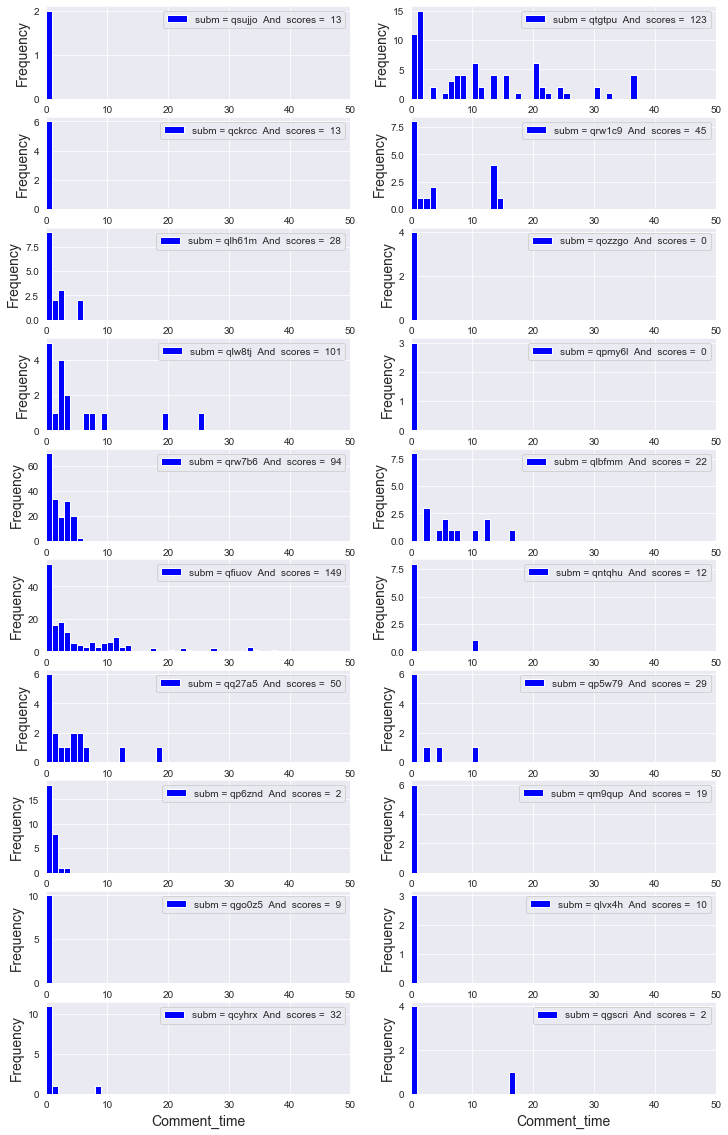

In [437]:
ids = np.random.choice(submission_Low,20)

binwidth = 1
fig,ax = plt.subplots(int(len(ids)/2),2,figsize=(12,20))
for i in range(len(ids)):
    submission = ids[i]
    scores = df_submission_Low.loc[df_submission_Low.submission_id == submission, 'score']
    times = df_comments_Low.loc[df_comments_Low.submission_id == submission, 'comment_time']
    sorted_times = sorted(times)
    durations = pd.to_datetime(times) - pd.to_datetime(sorted_times[0])
    comment_time_from_start = [t.total_seconds()/3600 for t in durations]
    ax[i//2,i%2].hist(comment_time_from_start,
                      bins=np.arange(min(comment_time_from_start), max(comment_time_from_start) + binwidth, binwidth),
                      color = 'b', label = ('subm = '+ str(submission)+'  And  '+'scores = '+ scores.to_string(index = False)))
    ax[i//2,i%2].set_xlim(left = 0, right = 50)
    ax[i//2,i%2].set_xlabel('Comment_time', fontsize = 14)
    ax[i//2, i%2].set_ylabel('Frequency', fontsize = 14)
    ax[i//2, i%2].legend(loc = 'best', fontsize = 10)
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\comment_time_hist_Low_upvotes.jpeg')
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\PatData\\comment_time_hist_Low_upvotes.svg')
plt.show()

In [447]:
stop_words = set(stopwords.words('english'))
punctuation = list(punctuation)

In [457]:
for element in ['I',"'s", "n't", '’',"'m","'re",'would','``','...','deleted','removed',"''",'fucking','fuck','like','ass']:
     stop_words.add(element)

In [449]:
ps = PorterStemmer()

In [458]:
most_common_list_top = []
scores = []
submission_id = []
ids = submission_top
i = 0
for submission in ids:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    comment_container = dictionary_top[str(submission)]
    listToStr = ' '.join([str(elem) for elem in comment_container])
    list_words = word_tokenize(listToStr)
    filtered_stopwords = [w for w in list_words if not w.lower() in stop_words]
    filtered_all = [w for w in filtered_stopwords if not w in punctuation]
    filtered_stems = [ps.stem(w) for w in filtered_all]
    fdist = FreqDist(filtered_stems)
    most_common_list_top.append(fdist.most_common(10))
    score_index = df_submission_top.loc[df_submission_top.submission_id == submission, 'score']
    submission_id.append(submission)
    scores.append(score_index.to_string(index = False))
    i = i + 1

Most_common_top_df = pd.DataFrame(list(zip(pd.Series(most_common_list_top), scores, submission_id)), columns = ['list of common words','scores','sub_id'])

90%

In [459]:
Most_common_top_df

,list of common words,scores,sub_id
0,"[(money, 65), (million, 45), (start, 43), (wif...",46551,qt5fe7
1,"[(elon, 115), (sell, 103), (share, 75), (tax, ...",51249,qtswnt
2,"[(tesla, 36), (short, 31), (tsla, 26), (way, 2...",36851,qmn4vd
3,"[(eat, 57), (ass🍑😛, 56), (manipul, 32), (stock...",41235,qsbj9q
4,"[(autist, 32), (logo, 29), (joke, 26), (autism...",51060,qec10r
...,...,...,...
87,"[(loss, 26), (money, 25), (go, 25), (make, 25)...",5666,qcexe0
88,"[(elon, 81), (tesla, 55), (get, 45), (berni, 4...",27792,quida5
89,"[(sell, 93), (stock, 76), (elon, 54), (buy, 53...",5334,qo8ded
90,"[(tax, 186), (unreal, 72), (pay, 51), (get, 45...",25612,qova51


In [455]:
most_common_list_Low = []
scores = []
submission_id = []
ids = dictionary_Low.keys()
i = 0
for submission in ids:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    comment_container = dictionary_Low[str(submission)]
    listToStr = ' '.join([str(elem) for elem in comment_container])
    list_words = word_tokenize(listToStr)
    filtered_stopwords = [w for w in list_words if not w.lower() in stop_words]
    filtered_all = [w for w in filtered_stopwords if not w in punctuation]
    filtered_stems = [ps.stem(w) for w in filtered_all]
    fdist = FreqDist(filtered_stems)
    most_common_list_Low.append(fdist.most_common(10))
    score_index = df_submission_Low.loc[df_submission_Low.submission_id == submission, 'score']
    submission_id.append(submission)
    scores.append(score_index.to_string(index = False))
    i = i + 1

Most_common_Low_df = pd.DataFrame(list(zip(pd.Series(most_common_list_Low), scores, submission_id)), columns = ['list of common words','scores','sub_id'])

90%

In [456]:
Most_common_Low_df

,list of common words,scores,sub_id
0,"[(wish, 26), (new, 12), (bottom, 8), (http, 7)...",25,qsisv7
1,"[(--, 4), (http, 4), (//www.reddit.com/message...",19,qdx8ma
2,"[(trade, 26), (day, 20), (get, 18), (option, 1...",65,qha2if
3,"[(http, 6), (--, 4), (//www.reddit.com/message...",6,qrw96g
4,"[(--, 4), (http, 4), (//www.reddit.com/message...",21,qhnoal
...,...,...,...
92,"[(--, 4), (http, 4), (//www.reddit.com/message...",52,qgm071
93,"[(approv, 22), (dexcom, 20), (year, 17), (day,...",123,qtgtpu
94,"[(--, 4), (http, 4), (//www.reddit.com/message...",23,qg7dn4
95,"[(call, 5), (--, 4), (http, 4), (//www.reddit....",65,qdn3lz
